In [55]:
import numpy as np
import pandas as pd
import datetime
import json
import requests
from scipy.optimize import fsolve
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.svm import SVR
import matplotlib.dates as mtd

In [56]:
ferrara = json.loads(requests.get('http://api.openweathermap.org/data/2.5/weather?q=Ferrara,IT&appid=5807ad2a45eb6bf4e81d137dafe74e15').text)

In [57]:
ferrara

{'coord': {'lon': 11.8333, 'lat': 44.8},
 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 282.83,
  'feels_like': 282.83,
  'temp_min': 282.62,
  'temp_max': 283.2,
  'pressure': 1029,
  'humidity': 95},
 'visibility': 700,
 'wind': {'speed': 0, 'deg': 0},
 'clouds': {'all': 100},
 'dt': 1672668963,
 'sys': {'type': 2,
  'id': 2007888,
  'country': 'IT',
  'sunrise': 1672642212,
  'sunset': 1672674148},
 'timezone': 3600,
 'id': 3177088,
 'name': 'Provincia di Ferrara',
 'cod': 200}

In [58]:
list(ferrara.keys())

['coord',
 'weather',
 'base',
 'main',
 'visibility',
 'wind',
 'clouds',
 'dt',
 'sys',
 'timezone',
 'id',
 'name',
 'cod']

In [59]:
print('Coordinates = ', ferrara['coord'])
print('Weather = ', ferrara['weather'])
print('base = ', ferrara['base'])
print('main = ', ferrara['main'])
print('visibility = ', ferrara['visibility'])
print('wind = ', ferrara['wind'])
print('clouds = ', ferrara['clouds'])
print('dt = ', ferrara['dt'])
print('sys = ', ferrara['sys'])
print('id = ', ferrara['id'])
print('name = ', ferrara['name'])
print('cod = ', ferrara['cod'])

Coordinates =  {'lon': 11.8333, 'lat': 44.8}
Weather =  [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50d'}]
base =  stations
main =  {'temp': 282.83, 'feels_like': 282.83, 'temp_min': 282.62, 'temp_max': 283.2, 'pressure': 1029, 'humidity': 95}
visibility =  700
wind =  {'speed': 0, 'deg': 0}
clouds =  {'all': 100}
dt =  1672668963
sys =  {'type': 2, 'id': 2007888, 'country': 'IT', 'sunrise': 1672642212, 'sunset': 1672674148}
id =  3177088
name =  Provincia di Ferrara
cod =  200


In [60]:
ferrara['main']['temp']

282.83

In [61]:
def prepare(city,city_name):
 temp = [ ]
 humidity = [ ]
 pressure = [ ]
 description = [ ]
 dt = [ ]
 wind_speed = [ ]
 wind_deg = [ ]
 temp.append(city['main']['temp']-273.15)
 humidity.append(city['main']['humidity'])
 pressure.append(city['main']['pressure'])
 description.append(city['weather'][0]['description'])
 dt.append(city['dt'])
 wind_speed.append(city['wind']['speed'])
 wind_deg.append(city['wind']['deg'])
 headings = ['temp','humidity','pressure','description','dt','wind_speed','wind_deg']
 data = [temp,humidity,pressure,description,dt,wind_speed,wind_deg]
 df = pd.DataFrame(data,index=headings)
 city = df.T
 city['city'] = city_name
 city['day'] = city['dt'].apply(datetime.datetime.fromtimestamp)
 return city

In [62]:
t1 = prepare(ferrara,'ferrara')
t1

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day
0,9.68,95,1029,fog,1672668963,0,0,ferrara,2023-01-02 14:16:03


In [63]:
df_ferrara = t1
t2 = prepare(ferrara,'ferrara')
df_ferrara = df_ferrara.append(t2)
df_ferrara

/tmp/ipykernel_2862/2884649487.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ferrara = df_ferrara.append(t2)


,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day
0,9.68,95,1029,fog,1672668963,0,0,ferrara,2023-01-02 14:16:03
0,9.68,95,1029,fog,1672668963,0,0,ferrara,2023-01-02 14:16:03


Start Analysis

In [64]:
df_ferrara=pd.read_csv('ferrara_270615.csv')
df_milano=pd.read_csv('milano_270615.csv')
df_mantova=pd.read_csv('mantova_270615.csv')
df_ravenna=pd.read_csv('ravenna_270615.csv')
df_torino=pd.read_csv('torino_270615.csv')
df_asti=pd.read_csv('asti_270615.csv')
df_bologna=pd.read_csv('bologna_270615.csv')
df_piacenza=pd.read_csv('piacenza_270615.csv')
df_cesena=pd.read_csv('cesena_270615.csv')
df_faenza=pd.read_csv('faenza_270615.csv')

In [65]:
df_cesena

,Unnamed: 0,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,0,23.34,82,1017,very heavy rain,1435387623,1.91,175.511,Cesena,2015-06-27 08:47:03,14
1,1,24.95,69,1018,very heavy rain,1435390801,2.01,159.500,Cesena,2015-06-27 09:40:01,14
2,2,25.67,73,1017,very heavy rain,1435394204,2.10,100.000,Cesena,2015-06-27 10:36:44,14
3,3,26.17,69,1017,very heavy rain,1435398652,3.10,120.000,Cesena,2015-06-27 11:50:52,14
4,4,27.07,61,1016,very heavy rain,1435402083,3.10,110.000,Cesena,2015-06-27 12:48:03,14
5,5,27.41,69,1016,very heavy rain,1435405721,3.60,110.000,Cesena,2015-06-27 13:48:41,14
6,6,27.38,65,1015,very heavy rain,1435409381,5.70,110.000,Cesena,2015-06-27 14:49:41,14
7,7,26.59,65,1014,very heavy rain,1435416585,5.10,110.000,Cesena,2015-06-27 16:49:45,14
8,8,27.16,65,1014,very heavy rain,1435420195,6.20,120.000,Cesena,2015-06-27 17:49:55,14
9,9,27.10,65,1014,very heavy rain,1435423927,6.70,120.000,Cesena,2015-06-27 18:52:07,14


In [66]:
dist = [df_ravenna['dist'][0],
     df_cesena['dist'][0],
     df_faenza['dist'][0],
     df_ferrara['dist'][0],
     df_bologna['dist'][0],
     df_mantova['dist'][0],
     df_piacenza['dist'][0],
     df_milano['dist'][0],
     df_asti['dist'][0],
     df_torino['dist'][0]
]
temp_max = [df_ravenna['temp'].max(),
     df_cesena['temp'].max(),
     df_faenza['temp'].max(),
     df_ferrara['temp'].max(),
     df_bologna['temp'].max(),
     df_mantova['temp'].max(),
     df_piacenza['temp'].max(),
     df_milano['temp'].max(),
     df_asti['temp'].max(),
     df_torino['temp'].max()
]
temp_min = [df_ravenna['temp'].min(),
     df_cesena['temp'].min(),
     df_faenza['temp'].min(),
     df_ferrara['temp'].min(),
     df_bologna['temp'].min(),
     df_mantova['temp'].min(),
     df_piacenza['temp'].min(),
     df_milano['temp'].min(),
     df_asti['temp'].min(),
     df_torino['temp'].min()
]
hum_min = [df_ravenna['humidity'].min(),
     df_cesena['humidity'].min(),
     df_faenza['humidity'].min(),
     df_ferrara['humidity'].min(),
     df_bologna['humidity'].min(),
     df_mantova['humidity'].min(),
     df_piacenza['humidity'].min(),
     df_milano['humidity'].min(),
     df_asti['humidity'].min(),
     df_torino['humidity'].min()
]
hum_max = [df_ravenna['humidity'].max(),
     df_cesena['humidity'].max(),
     df_faenza['humidity'].max(),
     df_ferrara['humidity'].max(),
     df_bologna['humidity'].max(),
     df_mantova['humidity'].max(),
     df_piacenza['humidity'].max(),
     df_milano['humidity'].max(),
     df_asti['humidity'].max(),
     df_torino['humidity'].max()
]

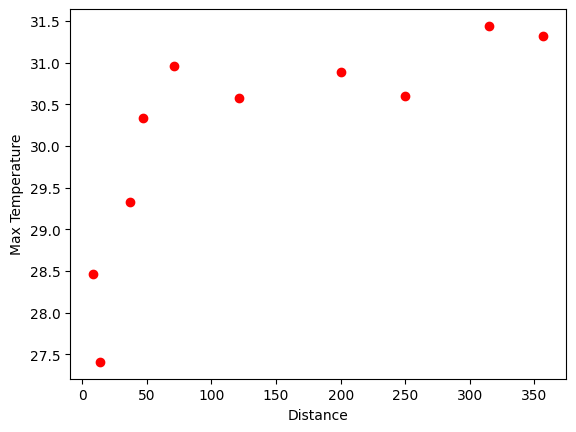

In [67]:
#temperatura massima
plt.xlabel('Distance')
plt.ylabel('Max Temperature')
plt.plot(dist,temp_max,'ro')

you can affirm that the hypothesis that the presence of the
sea somehow influences meteorological parameters is true (at least in the day today ☺).
Furthermore, you can see that the effect of the sea decreases rapidly, and after about
60-70 km, the maximum temperatures reach a plateau. An interesting thing would be to represent the two different trends with two straight lines obtained by linear regression. To do this, you can use the SVR method provided by the scikit-learn library

In [68]:
x = np.array(dist)
y = np.array(temp_max)
x1 = x[x<100]
x1 = x1.reshape((x1.size,1))
y1 = y[x<100]
x2 = x[x>50]
x2 = x2.reshape((x2.size,1))
y2 = y[x>50]

In [69]:
svr_lin1 = SVR(kernel='linear', C=1e3)
svr_lin2 = SVR(kernel='linear', C=1e3)
svr_lin1.fit(x1, y1)
svr_lin2.fit(x2, y2)
xp1 = np.arange(10,100,10).reshape((9,1))
xp2 = np.arange(50,400,50).reshape((7,1))
yp1 = svr_lin1.predict(xp1)
yp2 = svr_lin2.predict(xp2)


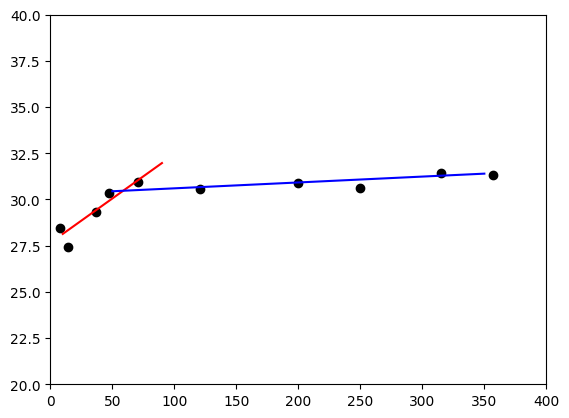

In [70]:
plt.plot(xp1, yp1, c='r', label='Strong sea effect')
plt.plot(xp2, yp2, c='b', label='Light sea effect')
plt.axis((0,400,20,40))
plt.scatter(x, y, c='k', label='data')

In [71]:
print( svr_lin1.coef_)
print( svr_lin1.intercept_)
print( svr_lin2.coef_)
print( svr_lin2.intercept_)


[[0.04794118]]
[27.65617647]
[[0.00317797]]
[30.2854661]


[x,y] = [ 58 , 30 ]


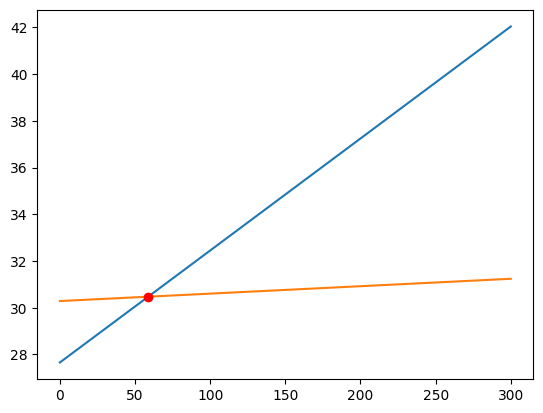

In [72]:


def line1(x):
    a1 = svr_lin1.coef_[0][0]
    b1 = svr_lin1.intercept_[0]
    return a1*x + b1
def line2(x):
    a2 = svr_lin2.coef_[0][0]
    b2 = svr_lin2.intercept_[0]
    return a2*x + b2
def findIntersection(fun1,fun2,x0):
 return fsolve(lambda x : fun1(x) - fun2(x),x0)

result = findIntersection(line1,line2,0.0)
print("[x,y] = [ %d , %d ]" % (result,line1(result)))
x = np.linspace(0,300,31)
plt.plot(x,line1(x),x,line2(x),result,line1(result),'ro')

The minimum temperatures appear to be independent of the
distance from the sea

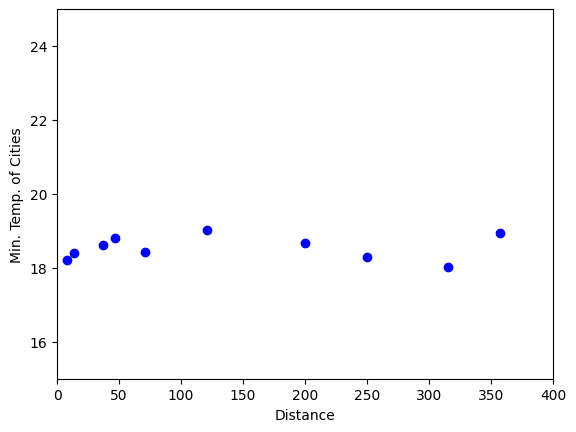

In [73]:
#temperatures min
plt.xlabel('Distance')
plt.ylabel('Min. Temp. of Cities')
plt.axis((0,400,15,25))
plt.plot(dist,temp_min,'bo')

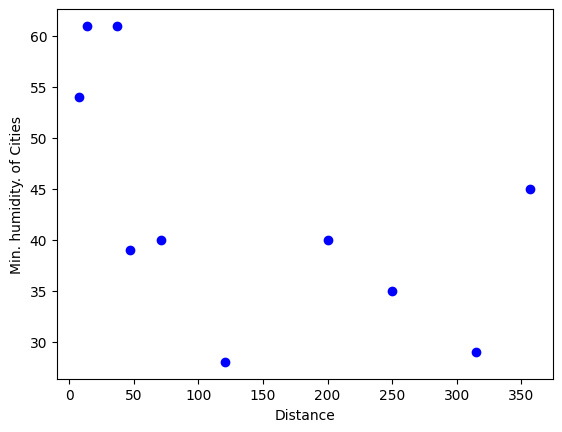

In [74]:
#min humidity
plt.xlabel('Distance')
plt.ylabel('Min. humidity. of Cities')
plt.plot(dist,hum_min,'bo')

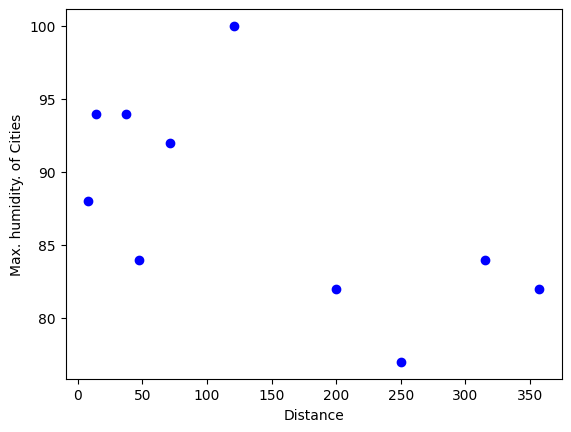

In [75]:
#max humidity
plt.xlabel('Distance')
plt.ylabel('Max. humidity. of Cities')
plt.plot(dist,hum_max,'bo')

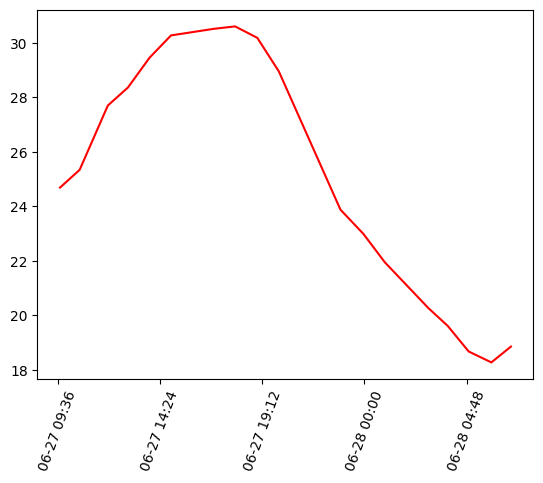

In [76]:
#temperature
y1 = df_milano['temp']
x1 = df_milano['day']
ts = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x1]
x = mtd.date2num(ts)
fig, ax = plt.subplots()
plt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
ax.plot(x,y1,'r')

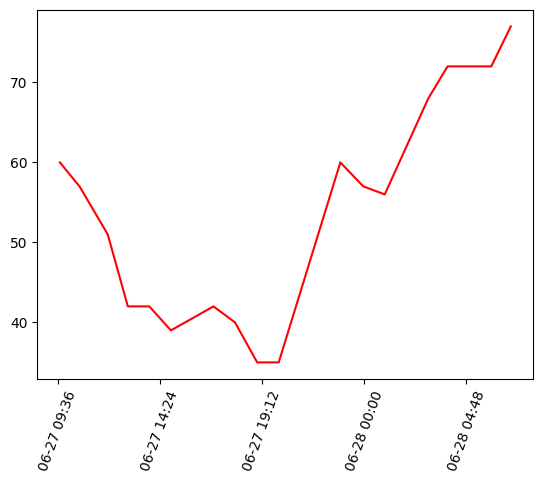

In [77]:
#humidity
y1 = df_milano['humidity']
x1 = df_milano['day']
ts = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x1]
x = mtd.date2num(ts)
fig, ax = plt.subplots()
plt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
ax.plot(x,y1,'r')

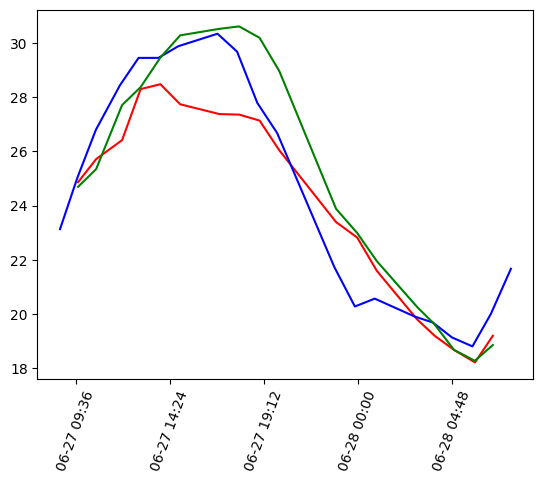

In [78]:
y1 = df_ravenna['temp']
x1 = df_ravenna['day']
y2 = df_ferrara['temp']
x2 = df_ferrara['day']
y3 = df_milano['temp']
x3 = df_milano['day']
ts1 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x1]
x1 = mtd.date2num(ts1)
ts2 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x2]
x2 = mtd.date2num(ts2)
ts3 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x3]
x3 = mtd.date2num(ts3)
fig, ax = plt.subplots()
plt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.plot(x1,y1,'r',x2,y2,'b',x3,y3,'g')

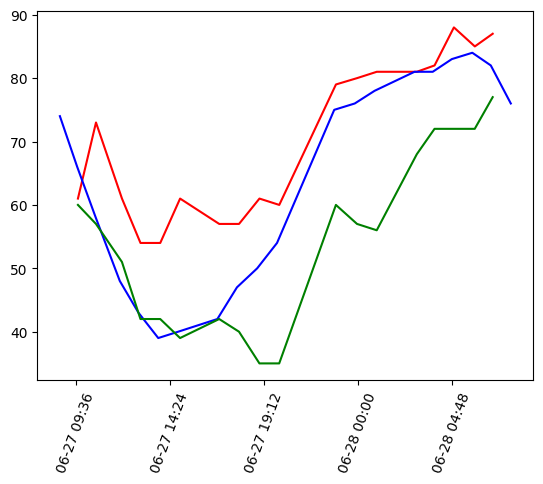

In [79]:
y1 = df_ravenna['humidity']
x1 = df_ravenna['day']
y2 = df_ferrara['humidity']
x2 = df_ferrara['day']
y3 = df_milano['humidity']
x3 = df_milano['day']
ts1 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x1]
x1 = mtd.date2num(ts1)
ts2 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x2]
x2 = mtd.date2num(ts2)
ts3 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x3]
x3 = mtd.date2num(ts3)
fig, ax = plt.subplots()
plt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.plot(x1,y1,'r',x2,y2,'b',x3,y3,'g')

The trend of the humidity during the day for three cities nearest the
sea (shown in red) and three cities farthest away (indicated in green)

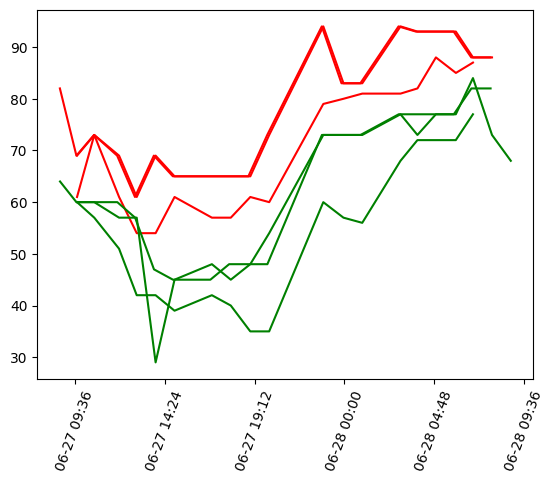

In [80]:
y1 = df_ravenna['humidity']
x1 = df_ravenna['day']
y2 = df_faenza['humidity']
x2 = df_faenza['day']
y3 = df_cesena['humidity']
x3 = df_cesena['day']
y4 = df_milano['humidity']
x4 = df_milano['day']
y5 = df_asti['humidity']
x5 = df_asti['day']
y6 = df_torino['humidity']
x6 = df_torino['day']
ts1 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x1]
x1 = mtd.date2num(ts1)
ts2 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x2]
x2 = mtd.date2num(ts2)
ts3 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x3]
x3 = mtd.date2num(ts3)
ts4 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x4]
x4 = mtd.date2num(ts4)
ts5 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x5]
x5 = mtd.date2num(ts5)
ts6 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x6]
x6 = mtd.date2num(ts6)
fig, ax = plt.subplots()
plt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.plot(x1,y1,'r',x2,y2,'r',x3,y3,'r')
plt.plot(x4,y4,'g',x5,y5,'g',x6,y6,'g')

The temperature of the three cities closest to the sea is shown 
in red, while the temperature of the three cities farthest away is in green.

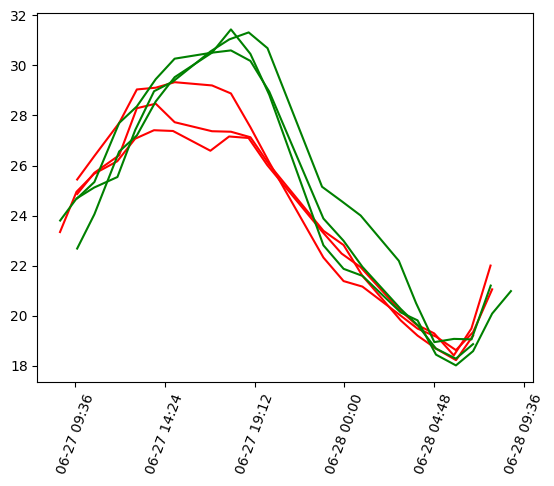

In [81]:
y1 = df_ravenna['temp']
x1 = df_ravenna['day']
y2 = df_faenza['temp']
x2 = df_faenza['day']
y3 = df_cesena['temp']
x3 = df_cesena['day']
y4 = df_milano['temp']
x4 = df_milano['day']
y5 = df_asti['temp']
x5 = df_asti['day']
y6 = df_torino['temp']
x6 = df_torino['day']
ts1 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x1]
x1 = mtd.date2num(ts1)
ts2 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x2]
x2 = mtd.date2num(ts2)
ts3 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x3]
x3 = mtd.date2num(ts3)
ts4 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x4]
x4 = mtd.date2num(ts4)
ts5 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x5]
x5 = mtd.date2num(ts5)
ts6 = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in x6]
x6 = mtd.date2num(ts6)
fig, ax = plt.subplots()
plt.xticks(rotation=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.plot(x1,y1,'r',x2,y2,'r',x3,y3,'r')
plt.plot(x4,y4,'g',x5,y5,'g',x6,y6,'g')

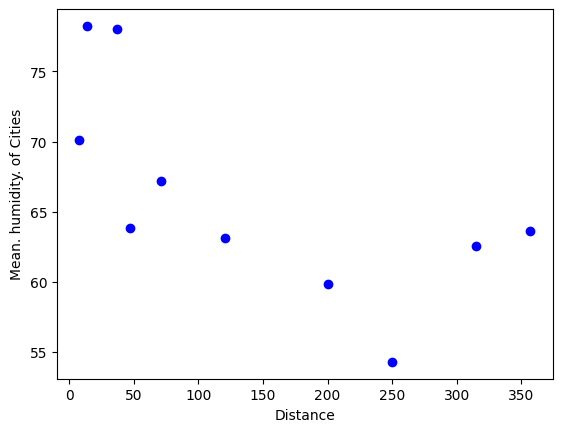

In [82]:
hum_mean = [df_ravenna['humidity'].mean(),
     df_cesena['humidity'].mean(),
     df_faenza['humidity'].mean(),
     df_ferrara['humidity'].mean(),
     df_bologna['humidity'].mean(),
     df_mantova['humidity'].mean(),
     df_piacenza['humidity'].mean(),
     df_milano['humidity'].mean(),
     df_asti['humidity'].mean(),
     df_torino['humidity'].mean()
]
plt.xlabel('Distance')
plt.ylabel('Mean. humidity. of Cities')
plt.plot(dist,hum_mean,'bo')

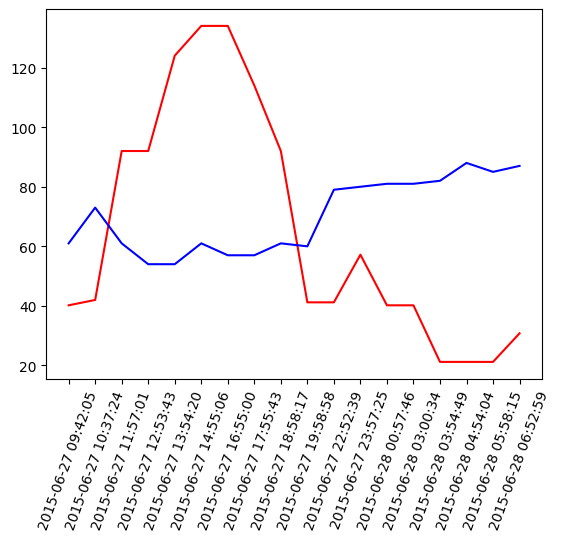

In [83]:
y1 = df_ravenna['wind_speed']*20
y2 = df_ravenna['humidity']
x = df_ravenna['day']
fig, ax = plt.subplots()
plt.xticks(rotation=70)
#hours = mdates.DateFormatter('%H:%M')
#ax.xaxis.set_major_formatter(hours)
plt.plot(x,y1,'r',x,y2,'b')

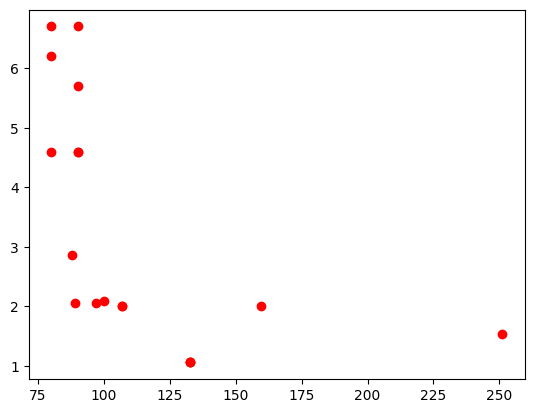

In [84]:
plt.plot(df_ravenna['wind_deg'],df_ravenna['wind_speed'],'ro')

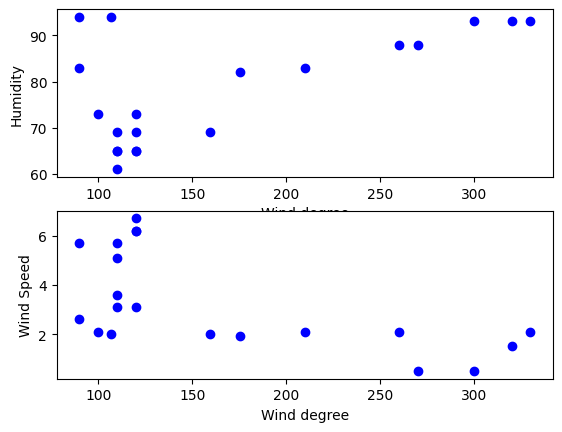

In [85]:
plt.subplot(211)
plt.xlabel('Wind degree')
plt.ylabel('Humidity')
plt.plot(df_cesena['wind_deg'],df_cesena['humidity'],'bo')
plt.subplot(212)
plt.xlabel('Wind degree')
plt.ylabel('Wind Speed')
plt.plot(df_cesena['wind_deg'],df_cesena['wind_speed'],'bo')

In [86]:
df_ravenna[['wind_deg','wind_speed','day']]

,wind_deg,wind_speed,day
0,159.5000,2.01,2015-06-27 09:42:05
1,100.0000,2.10,2015-06-27 10:37:24
2,80.0000,4.60,2015-06-27 11:57:01
3,90.0000,4.60,2015-06-27 12:53:43
4,80.0000,6.20,2015-06-27 13:54:20
5,80.0000,6.70,2015-06-27 14:55:06
6,90.0000,6.70,2015-06-27 16:55:00
7,90.0000,5.70,2015-06-27 17:55:43
8,90.0000,4.60,2015-06-27 18:58:17
9,97.0000,2.06,2015-06-27 19:58:58


In [87]:
df_cesena[['wind_deg','wind_speed','day']]

,wind_deg,wind_speed,day
0,175.511,1.91,2015-06-27 08:47:03
1,159.500,2.01,2015-06-27 09:40:01
2,100.000,2.10,2015-06-27 10:36:44
3,120.000,3.10,2015-06-27 11:50:52
4,110.000,3.10,2015-06-27 12:48:03
5,110.000,3.60,2015-06-27 13:48:41
6,110.000,5.70,2015-06-27 14:49:41
7,110.000,5.10,2015-06-27 16:49:45
8,120.000,6.20,2015-06-27 17:49:55
9,120.000,6.70,2015-06-27 18:52:07


In [88]:
hist, bins = np.histogram(df_ravenna['wind_deg'],8,[0,360])
print(hist)
print(bins)

[ 0  5 11  1  0  1  0  0]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


In [89]:
def showRoseWind(values,city_name,max_value):
   N = 8
   theta = np.arange(0.,2 * np.pi, 2 * np.pi / N)
   radii = np.array(values)
   plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
   colors = [(1-x/max_value, 1-x/max_value, 0.75) for x in radii]
   plt.bar(theta+np.pi/8, radii, width=(2*np.pi/N), bottom=0.0, color=colors)
   plt.title(city_name,x=0.2, fontsize=20)

In [90]:
df_ravenna

,Unnamed: 0,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,0,24.86,61,1017,very heavy rain,1435390925,2.01,159.5000,Ravenna,2015-06-27 09:42:05,8
1,1,25.71,73,1017,very heavy rain,1435394244,2.10,100.0000,Ravenna,2015-06-27 10:37:24,8
2,2,26.41,61,1017,very heavy rain,1435399021,4.60,80.0000,Ravenna,2015-06-27 11:57:01,8
3,3,28.29,54,1016,very heavy rain,1435402423,4.60,90.0000,Ravenna,2015-06-27 12:53:43,8
4,4,28.47,54,1016,very heavy rain,1435406060,6.20,80.0000,Ravenna,2015-06-27 13:54:20,8
5,5,27.73,61,1015,very heavy rain,1435409706,6.70,80.0000,Ravenna,2015-06-27 14:55:06,8
6,6,27.37,57,1014,very heavy rain,1435416900,6.70,90.0000,Ravenna,2015-06-27 16:55:00,8
7,7,27.35,57,1014,very heavy rain,1435420543,5.70,90.0000,Ravenna,2015-06-27 17:55:43,8
8,8,27.13,61,1013,very heavy rain,1435424297,4.60,90.0000,Ravenna,2015-06-27 18:58:17,8
9,9,26.03,60,1014,very heavy rain,1435427938,2.06,97.0000,Ravenna,2015-06-27 19:58:58,8


[ 0  5 11  1  0  1  0  0]


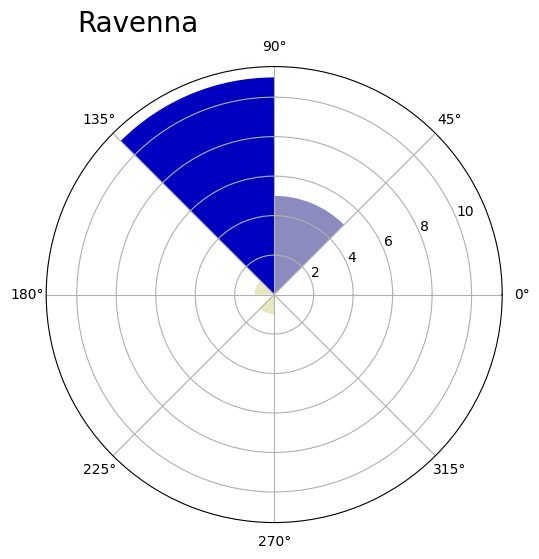

In [91]:
hist, bin = np.histogram(df_ravenna['wind_deg'],8,[0,360])
print(hist)
showRoseWind(hist,'Ravenna', max(hist))

[4 3 0 4 0 2 5 2]


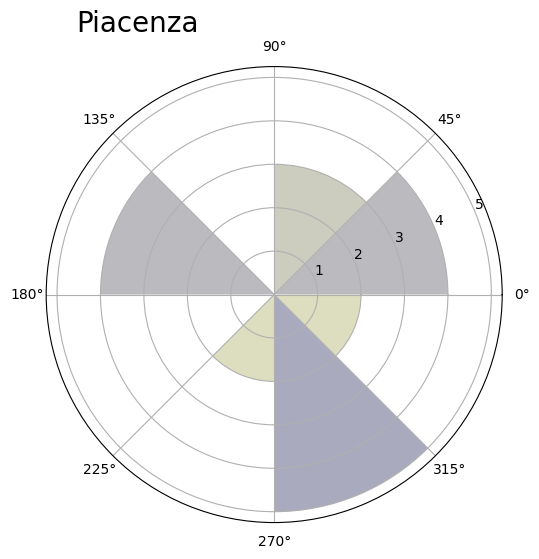

In [92]:
hist, bin = np.histogram(df_piacenza['wind_deg'],8,[0,360])
print(hist)
showRoseWind(hist,'Piacenza', 15.0)


In [93]:
print(df_milano[df_milano['wind_deg']<45]['wind_speed'])
print(df_milano[df_milano['wind_deg']<45]['wind_speed'].mean())


15    2.6
16    2.6
17    0.5
Name: wind_speed, dtype: float64
1.9000000000000001


In [94]:
#print(df_milano[df_milano['wind_deg']<45]['wind_speed'].mean())
print(df_milano[(df_milano['wind_deg']>0) & (df_milano['wind_deg']<45)]['wind_speed'].mean())
print(df_milano[(df_milano['wind_deg']>44) & (df_milano['wind_deg']<90)]['wind_speed'].mean())
print(df_milano[(df_milano['wind_deg']>89) & (df_milano['wind_deg']<135)]['wind_speed'].mean())
print(df_milano[(df_milano['wind_deg']>134) & (df_milano['wind_deg']<180)]['wind_speed'].mean())
print(df_milano[(df_milano['wind_deg']>179) & (df_milano['wind_deg']<225)]['wind_speed'].mean())
print(df_milano[(df_milano['wind_deg']>224) & (df_milano['wind_deg']<270)]['wind_speed'].mean())
print(df_milano[(df_milano['wind_deg']>269) & (df_milano['wind_deg']<315)]['wind_speed'].mean())
print(df_milano[(df_milano['wind_deg']>314) & (df_milano['wind_deg']<360)]['wind_speed'].mean())
#print(df_milano[df_milano['wind_deg']>314]['wind_speed'].mean())

2.6
2.6
3.5999999999999996
2.35
2.25
2.35
2.05
nan


In [95]:
degs = np.arange(45,361,45)
print(degs)

[ 45  90 135 180 225 270 315 360]


In [96]:
tmp =  []
for deg in degs:
    #print df_milano[(df_milano['wind_deg']>(deg-46)) & (df_milano['wind_deg']<deg)]['wind_speed'].mean()
    tmp.append(df_milano[(df_milano['wind_deg']>(deg-46)) & (df_milano['wind_deg']<deg)]['wind_speed'].mean())
speeds = np.array(tmp)
print(speeds)
speeds = np.nan_to_num(speeds)
print(speeds)

[1.9  2.6  3.6  2.35 2.25 2.35 2.05  nan]
[1.9  2.6  3.6  2.35 2.25 2.35 2.05 0.  ]


Text(0.2, 1.0, 'Milano')

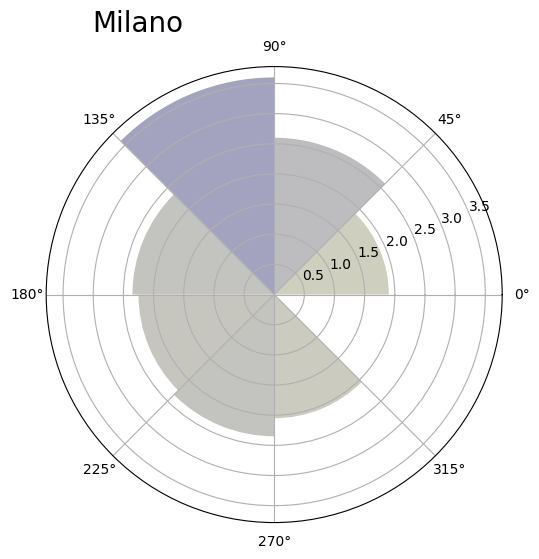

In [97]:
N = 8
theta = np.arange(0,2 * np.pi, 2 * np.pi / N)
radii = np.array(speeds)
plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
colors = [(1-x/10.0, 1-x/10.0, 0.75) for x in radii]
bars = plt.bar(theta+np.pi/8, radii, width=(2*np.pi/N), bottom=0.0, color=colors)
plt.title('Milano',x=0.2, fontsize=20)


In [98]:
def RoseWind_Speed(df_city):
   degs = np.arange(45,361,45)
   tmp =  []
   for deg in degs:
      tmp.append(df_city[(df_city['wind_deg']>(deg-46)) & (df_city['wind_deg']<deg)]['wind_speed'].mean())
   return np.nan_to_num(tmp)

In [99]:
def showRoseWind_Speed(speeds,city_name):
    N = 8
    theta = np.arange(0,2 * np.pi, 2 * np.pi / N)
    radii = np.array(speeds)
    plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
    colors = [(1-x/10.0, 1-x/10.0, 0.75) for x in radii]
    bars = plt.bar(theta+np.pi/8, radii, width=(2*np.pi/N), bottom=0.0, color=colors)
    plt.title(city_name,x=0.2, fontsize=20)


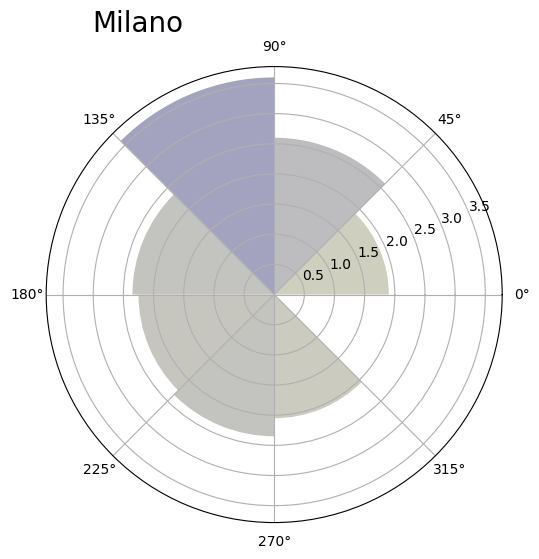

In [100]:
showRoseWind_Speed(RoseWind_Speed(df_milano),'Milano')

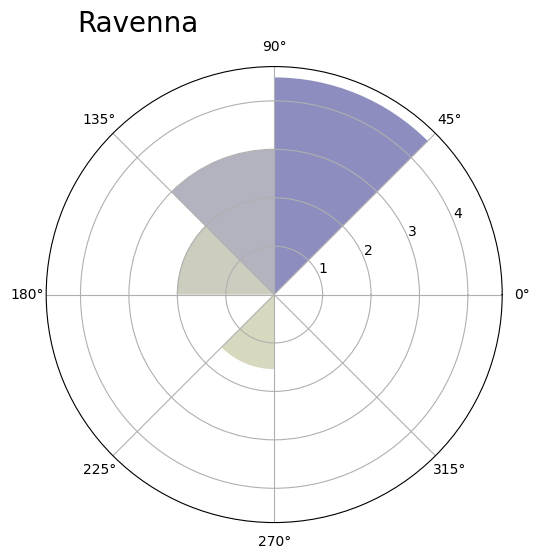

In [101]:
showRoseWind_Speed(RoseWind_Speed(df_ravenna),'Ravenna')

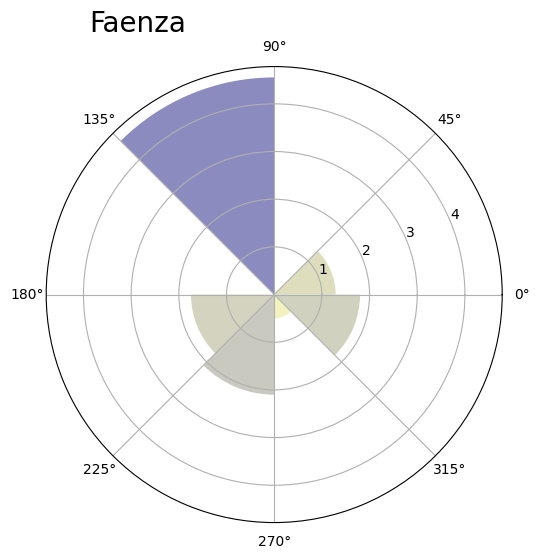

In [102]:
showRoseWind_Speed(RoseWind_Speed(df_faenza),'Faenza')

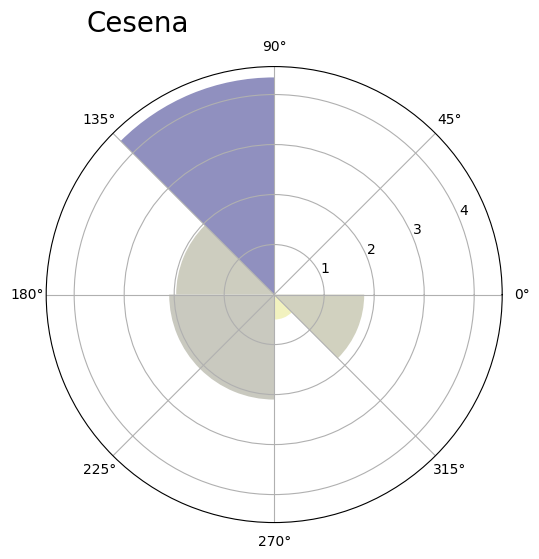

In [103]:
showRoseWind_Speed(RoseWind_Speed(df_cesena),'Cesena')

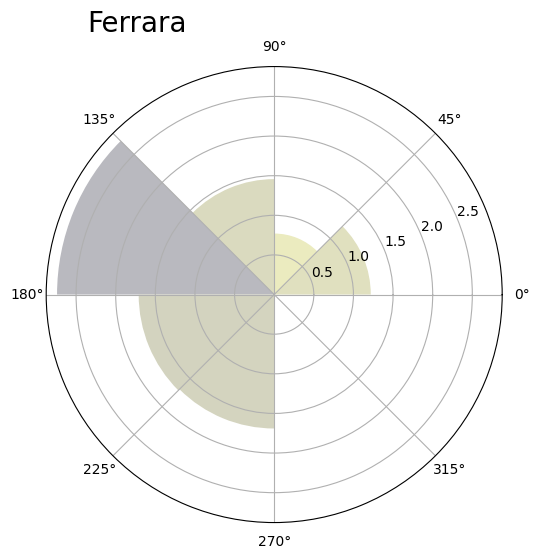

In [104]:
showRoseWind_Speed(RoseWind_Speed(df_ferrara),'Ferrara')

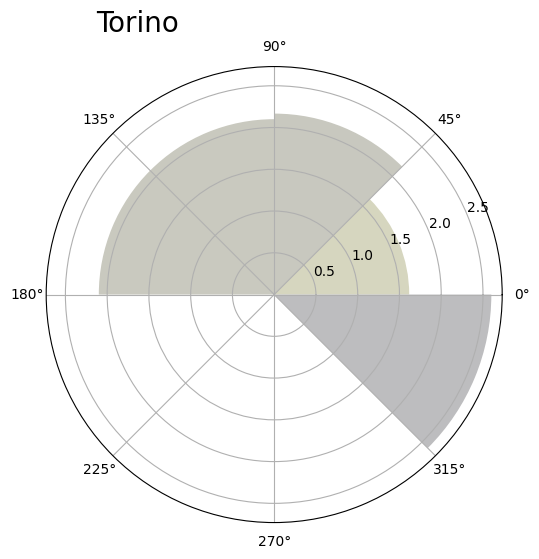

In [105]:
showRoseWind_Speed(RoseWind_Speed(df_torino),'Torino')

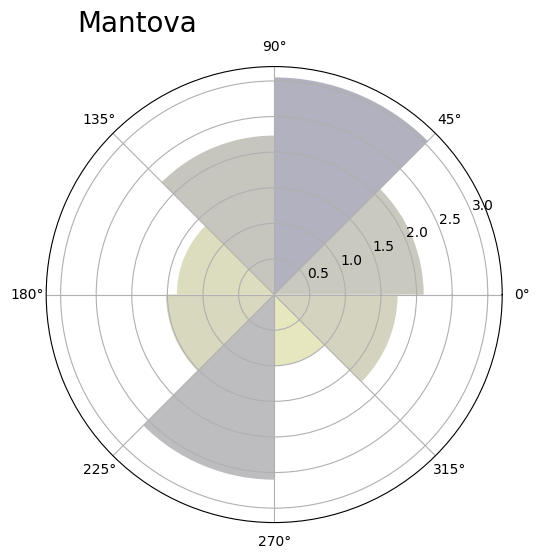

In [106]:
showRoseWind_Speed(RoseWind_Speed(df_mantova),'Mantova')

In [107]:
df_ferrara.to_csv('ferrara.csv')
df_milano.to_csv('milano.csv')
df_mantova.to_csv('mantova.csv')
df_ravenna.to_csv('ravenna.csv')
df_torino.to_csv('torino.csv')
df_asti.to_csv('asti.csv')
df_bologna.to_csv('bologna.csv')
df_piacenza.to_csv('piacenza.csv')
df_cesena.to_csv('cesena.csv')
df_faenza.to_csv('faenza.csv')